### a quick hack notebook to combine the pRT models produced by Generate_Atmospheres.py
Combines all the 100nm chunks into one file

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from pathlib import Path
import matplotlib.patches as patches

In [36]:
# take the 100nm models and concatenate them
metallicity = ['1x']
CO = ['0.5']
species     = ['CO2'] # edit to include species in model ['CH4','CO','CO2','H2O','NH3']
sp          = '_'.join(i for i in species)

for met in metallicity:
    for rat in CO:
        mod_dir = '{}_metallicity_{}_CO_ratio/'.format(met,rat)
        # dig out the models at each wavelength
        mod_files = sorted(glob.glob(mod_dir+'*/pRT_data_{}.dat'.format(sp)))
        W_mod = []
        T_depth = []
        for ifile in mod_files:
            with open(ifile, 'r') as data:
                lines = data.readlines()
                data.close()
            for line in lines[4:]:
                v = line.split(' ')
                W_mod.append(float(v[0]))
                T_depth.append(float(v[1].split('\n')[0]))
        W_mod = np.array(W_mod)
        T_depth = np.array(T_depth)
        file = Path(mod_dir+'pRT_data_full_{}.dat'.format(sp))
        file.touch(exist_ok=True)
        with open(file, 'w') as pRT_output:
            pRT_output.write('Atmospheric Species: ')
            pRT_output.write('{}'.format(sp) + '\n')
            pRT_output.write('Metallicity: ' + str(met) + '\n')
            pRT_output.write('C/O_Ratio: ' + str(rat) + '\n')
            pRT_output.write('Wavelength[nm] Flux_variation\n')
            for i in range(len(W_mod)):
                pRT_output.writelines(str(W_mod[i]) + ' ' + str(T_depth[i]) + '\n')
            pRT_output.close()

In [15]:
# Try and read in one of the models
mod_dir = '{}_metallicity_{}_CO_ratio/'.format('1x','0.5')
# dig out the models at each wavelength
mod_file = mod_dir+'pRT_data_full_CH4_CO_CO2_H2O_NH3.dat'
W_mod = []
T_depth = []
with open(mod_file, 'r') as data:
    lines = data.readlines()
    data.close()
for line in lines[4:]:
    v = line.split(' ')
    W_mod.append(float(v[0]))
    T_depth.append(float(v[1].split('\n')[0]))

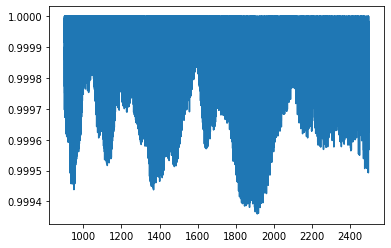

In [16]:
plt.plot(W_mod,T_depth)

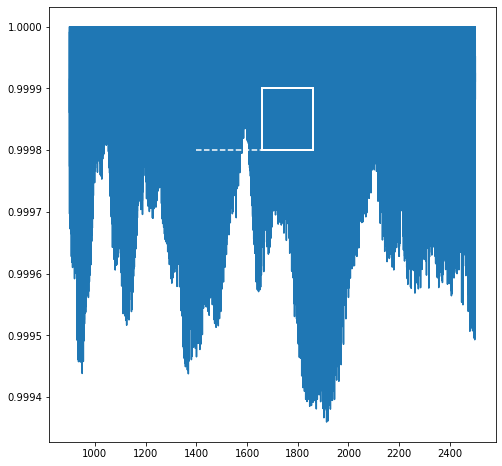

In [34]:
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(W_mod,T_depth)
plt.hlines(0.9998, 1400, 1660,ls='--',color='w')
# Create a Rectangle patch
rect = patches.Rectangle((1660,0.9998), 200, 0.0001, lw=2, ec='w', facecolor='r',zorder=2, fill=False)

# Add the patch to the Axes
ax.add_patch(rect)

In [33]:
Vmin       = -40.0
Vmax       =  40.0
Nv         = 81
Vsys       = np.linspace(Vmin,Vmax,Nv)
np.ptp(Vsys)

80.0